# Random Forest

### This script contains the following:
#### 1. Importing Libraries and Data
#### 2. Data Wrangling
#### 3. Reshaping
#### 4. Data Splitting 
#### 5. Random Forest Model
#### 6. Feature Importance
#### 7. Budapest
#### 8. Sonnblick
#### 9. Oslo

### 1. Importing Libraries and Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [5]:
path = r'C:\Users\mosh_\OneDrive\Desktop\Career Foundry\Machine Learning with Python\Achievement 2- Real-world appllication of Machine Learning\Data Sets'

In [6]:
path

'C:\\Users\\mosh_\\OneDrive\\Desktop\\Career Foundry\\Machine Learning with Python\\Achievement 2- Real-world appllication of Machine Learning\\Data Sets'

In [7]:
df = pd.read_csv(os.path.join(path, 'weather cleaned with date.csv'))
df

Unnamed: 0      DATE  BASEL_cloud_cover  BASEL_humidity  \
0               0  19600101                  7            0.85   
1               1  19600102                  6            0.84   
2               2  19600103                  8            0.90   
3               3  19600104                  3            0.92   
4               4  19600105                  6            0.95   
...           ...       ...                ...             ...   
22945       22945  20221027                  1            0.79   
22946       22946  20221028                  6            0.77   
22947       22947  20221029                  4            0.76   
22948       22948  20221030                  5            0.80   
22949       22949  20221031                  5            0.84   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0              1.0180                    0.32                 0.09   
1              1.0180                    0.36                 1.05   
2              1.0180                    0.18                 0.30   
3              1.0180                    0.58                 0.00   
4              1.0180                    0.65                 0.14   
...               ...                     ...                  ...   
22945          1.0248                    1.34                 0.22   
22946          1.0244                    1.34                 0.22   
22947          1.0227                    1.34                 0.22   
22948          1.0212                    1.34                 0.22   
22949          1.0193                    1.34                 0.22   

       BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  \
0                 0.7              6.5             0.8  ...   
1                 1.1              6.1             3.3  ...   
2                 0.0              8.5             5.1  ...   
3                 4.1              6.3             3.8  ...   
4                 5.4              3.0            -0.7  ...   
...               ...              ...             ...  ...   
22945             7.7             15.9            11.4  ...   
22946             5.4             16.7            14.3  ...   
22947             6.1             16.7            13.1  ...   
22948             5.8             15.4            11.6  ...   
22949             3.2             13.5             9.9  ...   

       STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
0                     4.9                     5               0.88   
1                     5.0                     7               0.91   
2                     4.1                     7               0.91   
3                     2.3                     7               0.86   
4                     4.3                     3               0.80   
...                   ...                   ...                ...   
22945                14.2                     5               0.82   
22946                14.3                     5               0.82   
22947                14.4                     5               0.82   
22948                12.4                     5               0.82   
22949                12.6                     5               0.82   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0                 1.0003                       0.45                    0.34   
1                 1.0007                       0.25                    0.84   
2                 1.0096                       0.17                    0.08   
3                 1.0184                       0.13                    0.98   
4                 1.0328                       0.46                    0.00   
...                  ...                        ...                     ...   
22945             1.0142                       1.13                    0.41   
22946             1.0142                       1.13                    0.41   
22947             1.0142                       1.13             

In [8]:
pleasant = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

### 2. Data Wrangling

Reducing the dataset down to just 1 year - 2010

In [11]:
df2010 = df[df['DATE'].astype(str).str.startswith('201')] 
df2010.head()

Unnamed: 0      DATE  BASEL_cloud_cover  BASEL_humidity  \
18263       18263  20100101                  8            0.93   
18264       18264  20100102                  3            0.74   
18265       18265  20100103                  3            0.75   
18266       18266  20100104                  5            0.83   
18267       18267  20100105                  7            0.78   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
18263          0.9965                    0.18                 0.56   
18264          1.0193                    0.58                 0.00   
18265          1.0226                    0.61                 0.00   
18266          1.0169                    0.48                 0.00   
18267          1.0073                    0.53                 0.04   

       BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  \
18263             0.0              2.9            -0.2  ...   
18264             5.2             -1.5            -4.2  ...   
18265             6.3             -3.2            -6.0  ...   
18266             3.7             -4.9            -8.3  ...   
18267             4.4             -4.0            -7.1  ...   

       STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
18263                -7.0                     1               0.80   
18264                -7.1                     1               0.82   
18265                -7.1                     4               0.71   
18266                -3.6                     2               0.67   
18267                -5.5                     4               0.78   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
18263             1.0121                       0.43                    0.00   
18264             1.0196                       0.45                    0.00   
18265             1.0196                       0.36                    0.41   
18266             1.0219                       0.48                    0.51   
18267             1.0117                       0.45                    0.09   

       VALENTIA_sunshine  VALENTIA_temp_mean  VALENTIA_temp_min  \
18263                6.0                 1.7               -1.6   
18264                6.0                 0.8               -4.5   
18265                1.6                 0.5               -4.1   
18266                6.5                 3.7                1.3   
18267                4.7                 2.3               -0.7   

       VALENTIA_temp_max  
18263                5.0  
18264                6.2  
18265                5.1  
18266                3.8  
18267                5.4  

[5 rows x 137 columns]

In [12]:
df2010.shape

(3652, 137)

In [13]:
pleasant2010 = pleasant[pleasant['DATE'].astype(str).str.startswith('201')] 
pleasant2010.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263  20100101                       0                          0   
18264  20100102                       0                          0   
18265  20100103                       0                          0   
18266  20100104                       0                          0   
18267  20100105                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   
18264                          0                        0   
18265                          0                        0   
18266                          0                        0   
18267                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   
18264                            0                          0   
18265                            0                          0   
18266                            0                          0   
18267                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   
18264                        0                           0   
18265                        0                           0   
18266                        0                           0   
18267                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   
18264                            0                        0   
18265                            0                        0   
18266                            0                        0   
18267                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   
18264                          0                      0   
18265                          0                      0   
18266                          0                      0   
18267                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
18263                           0                           0   
18264                           0                           0   
18265                           0                           0   
18266                           0                           0   
18267                           0                           0   

       VALENTIA_pleasant_weather  
18263                          0  
18264                          0  
18265                          0  
18266                          0  
18267                          0

In [14]:
pleasant2010.shape

(3652, 16)

In [15]:
# dropping the DATE column
df2010 = df2010.drop(columns=['DATE','Unnamed: 0'])
df2010

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18263                  8            0.93          0.9965   
18264                  3            0.74          1.0193   
18265                  3            0.75          1.0226   
18266                  5            0.83          1.0169   
18267                  7            0.78          1.0073   
...                  ...             ...             ...   
21910                  8            0.92          1.0273   
21911                  7            0.86          1.0380   
21912                  6            0.93          1.0387   
21913                  1            0.81          1.0354   
21914                  5            0.87          1.0350   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18263                    0.18                 0.56             0.0   
18264                    0.58                 0.00             5.2   
18265                    0.61                 0.00             6.3   
18266                    0.48                 0.00             3.7   
18267                    0.53                 0.04             4.4   
...                       ...                  ...             ...   
21910                    0.15                 0.52             0.1   
21911                    0.35                 0.00             1.3   
21912                    0.61                 0.00             4.9   
21913                    0.64                 0.00             6.5   
21914                    0.58                 0.00             3.5   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
18263              2.9            -0.2             4.8                     6   
18264             -1.5            -4.2             0.4                     8   
18265             -3.2            -6.0             1.1                     7   
18266             -4.9            -8.3            -3.1                     2   
18267             -4.0            -7.1            -1.5                     6   
...                ...             ...             ...                   ...   
21910              6.8             5.6             7.9                     5   
21911              3.7            -0.6             5.7                     8   
21912             -0.8            -2.7             2.6                     8   
21913              0.5            -3.0             5.1                     6   
21914              0.4            -1.3             3.5                     2   

       ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
18263  ...                -7.0                     1               0.80   
18264  ...                -7.1                     1               0.82   
18265  ...                -7.1                     4               0.71   
18266  ...                -3.6                     2               0.67   
18267  ...                -5.5                     4               0.78   
...    ...                 ...                   ...                ...   
21910  ...                 0.2                     5               0.82   
21911  ...                -1.0                     5               0.82   
21912  ...                 5.8                     5               0.82   
21913  ...                 9.6                     5               0.82   
21914  ...                 8.5                     5               0.82   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
18263             1.0121                       0.43                    0.00   
18264             1.0196                       0.45                    0.00   
18265             1.0196                       0.36                    0.41   
18266             1.0219                       0.48                    0.51   
18267             1.0117                       0.45                    0.09   
...                  ...                        ...                     ...   
21910             1.0142      

In [16]:
# dropping the DATE column

pleasant2010 = pleasant2010.drop(columns=['DATE'])
pleasant2010

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263                       0                          0   
18264                       0                          0   
18265                       0                          0   
18266                       0                          0   
18267                       0                          0   
...                       ...                        ...   
21910                       0                          0   
21911                       0                          0   
21912                       0                          0   
21913                       0                          0   
21914                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   
18264                          0                        0   
18265                          0                        0   
18266                          0                        0   
18267                          0                        0   
...                          ...                      ...   
21910                          0                        0   
21911                          0                        0   
21912                          0                        0   
21913                          0                        0   
21914                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   
18264                            0                          0   
18265                            0                          0   
18266                            0                          0   
18267                            0                          0   
...                            ...                        ...   
21910                            0                          0   
21911                            0                          0   
21912                            0                          0   
21913                            0                          0   
21914                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   
18264                        0                           0   
18265                        0                           0   
18266                        0                           0   
18267                        0                           0   
...                        ...                         ...   
21910                        0                           0   
21911                        0                           0   
21912                        0                           0   
21913                        0                           0   
21914                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   
18264                            0                        0   
18265                            0                        0   
18266                            0                        0   
18267                            0                        0   
...                            ...                      ...   
21910                            0                        0   
21911                            0                        0   
21912                            0                        0   
21913                            0                        0   
21914                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   
18264                          0                      0   
18265                          0                      0   
18266                          0  

In [17]:
# Extract stations list

stations = [col.split('_')[0] for col in df2010.columns if '_' in col]

In [18]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [19]:
# Create a dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select columns that belong to the current station
    station_columns = [col for col in  df2010.columns if col.startswith(station)]
    
    # Count non-missing entries across all columns for the station
    station_frequencies[station] =  df2010[station_columns].notna().sum().sum()

# Print the frequency of entries for each station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")

Frequency of entries for each weather station:
SONNBLICK: 32868 entries
MADRID: 32868 entries
KASSEL: 32868 entries
OSLO: 32868 entries
MAASTRICHT: 32868 entries
MUNCHENB: 32868 entries
STOCKHOLM: 32868 entries
BELGRADE: 32868 entries
BUDAPEST: 32868 entries
LJUBLJANA: 32868 entries
BASEL: 32868 entries
HEATHROW: 32868 entries
DUSSELDORF: 32868 entries
DEBILT: 32868 entries
VALENTIA: 32868 entries


Each station has the same number of entries

### 3. Reshaping 

In [22]:
X = df2010

In [23]:
y = pleasant2010

In [24]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [25]:
X.shape

(3652, 135)

In [26]:
y.shape

(3652, 15)

### 4. Data Splitting 

In [28]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [29]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


### 5. Random Forest Model

In [31]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5826944140197152


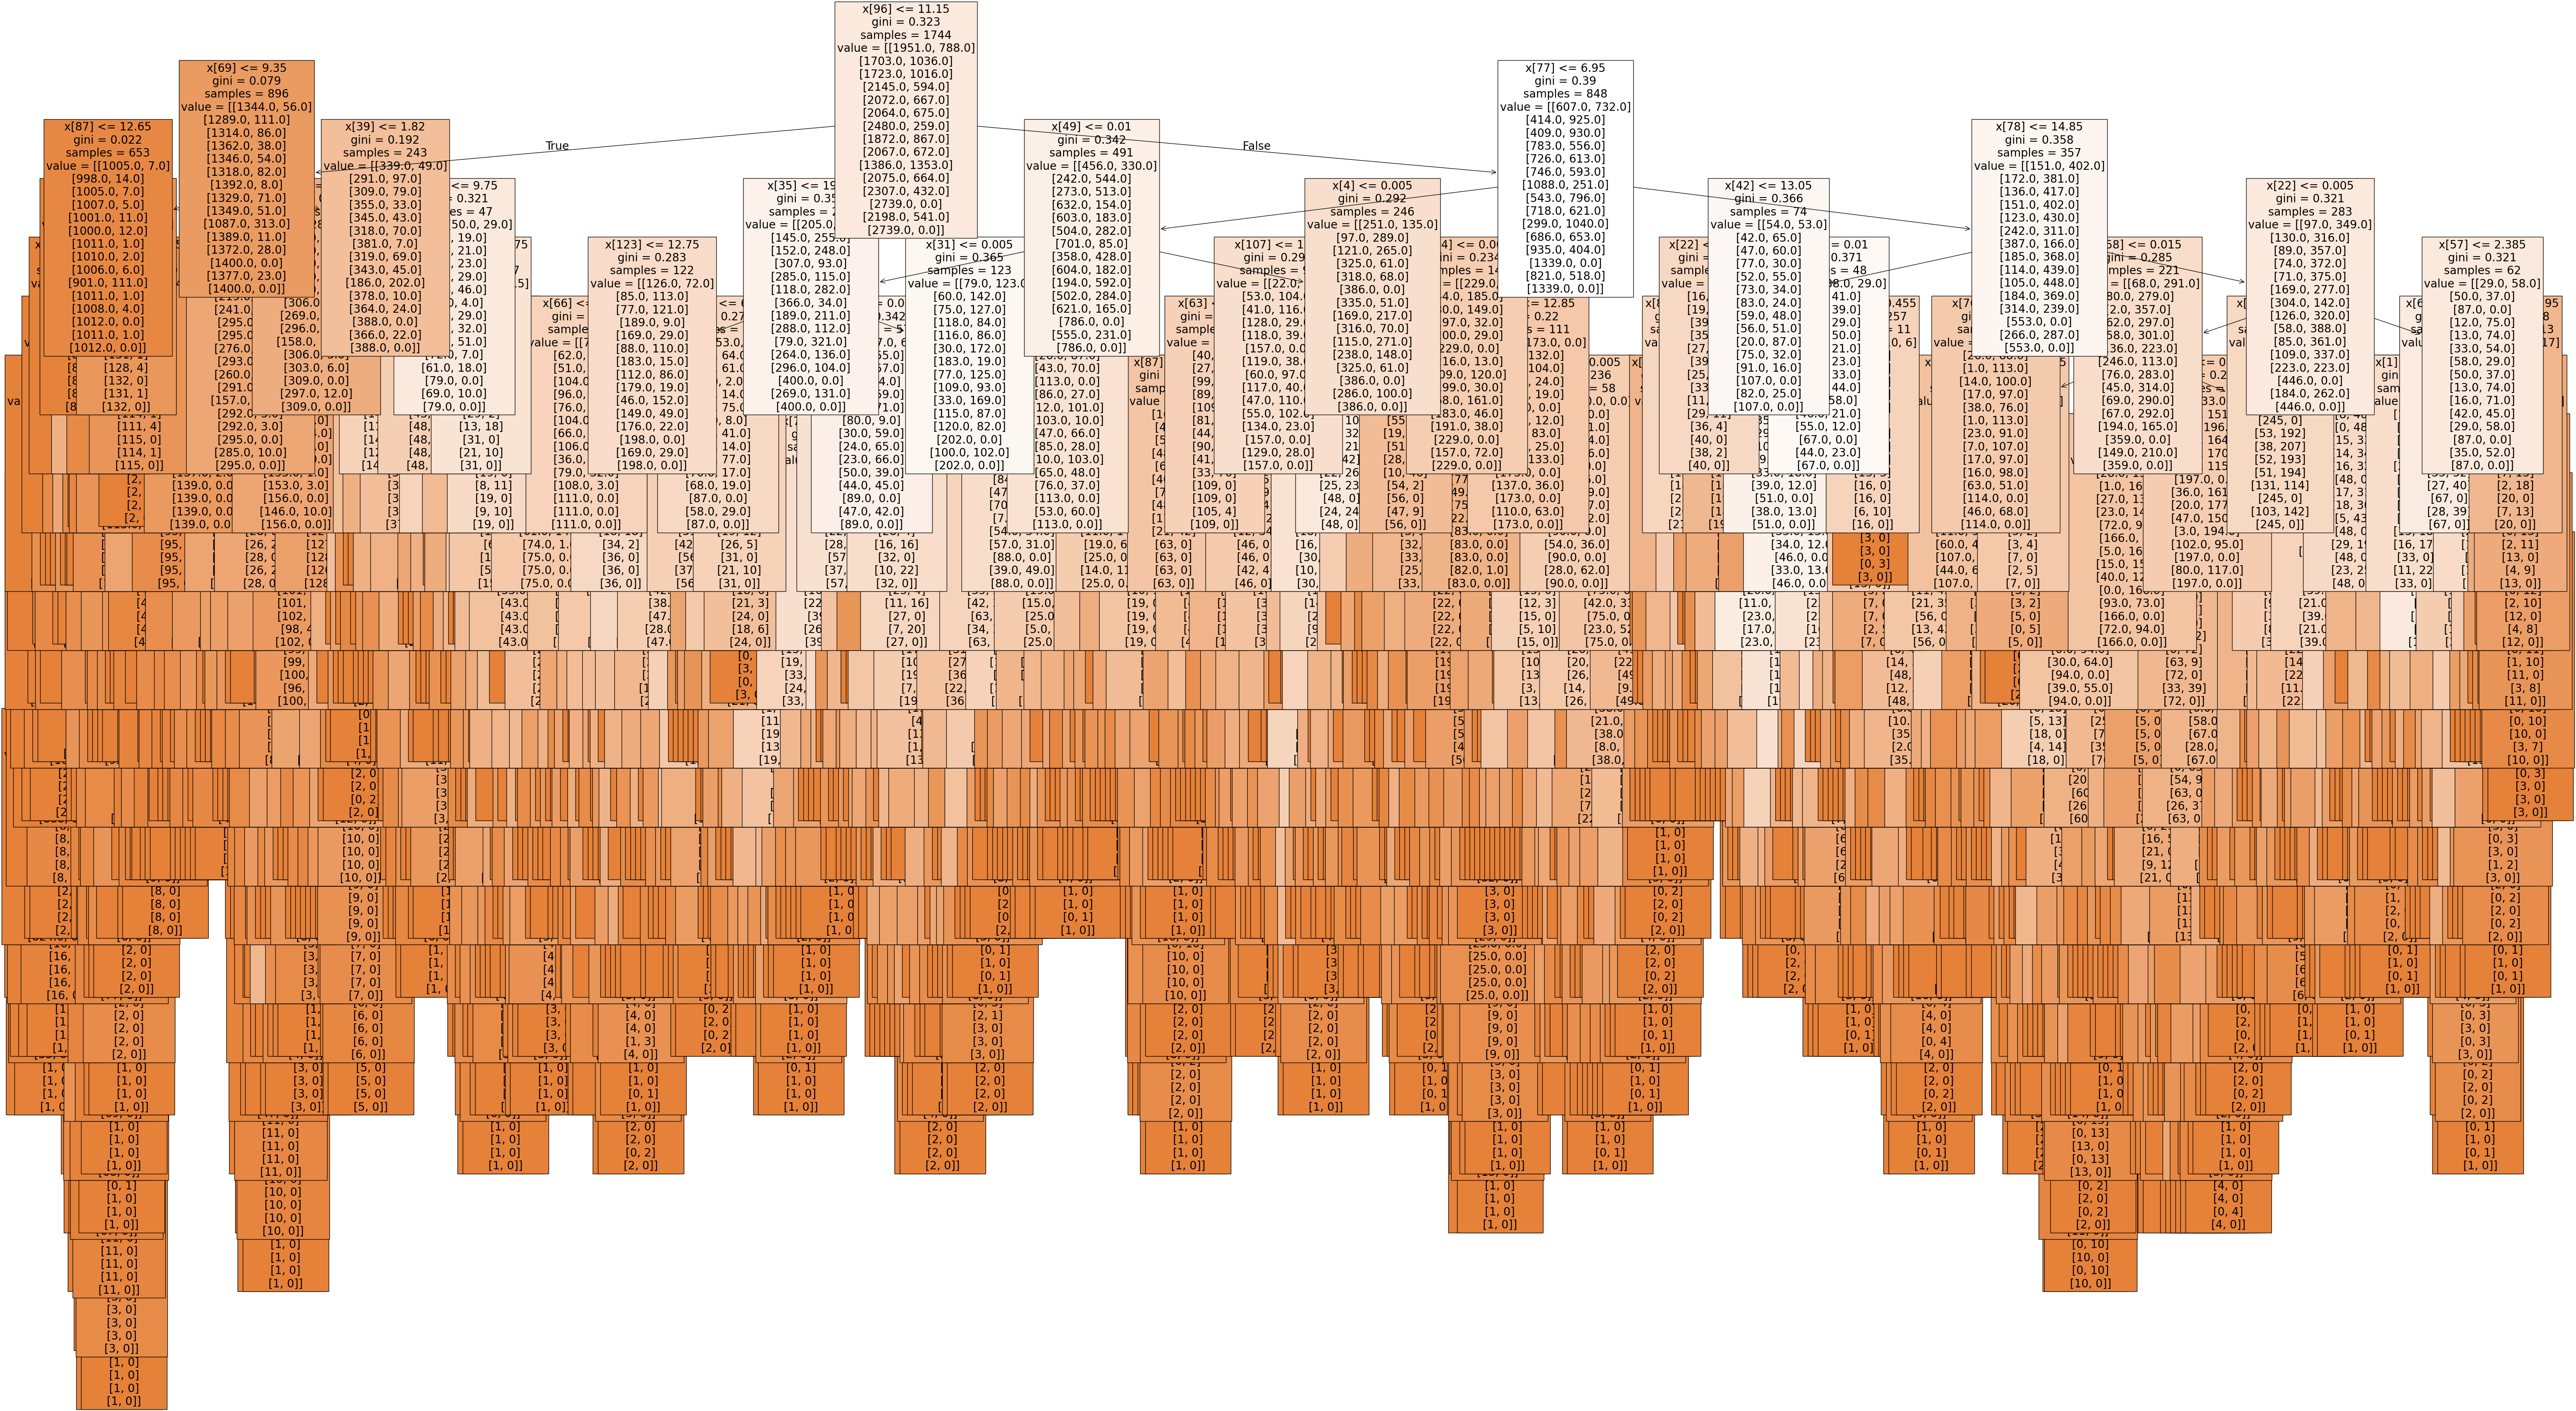

In [33]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);

### 6. Feature Importance

In [35]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(135,)


array([2.74164615e-03, 3.09272033e-03, 3.61162853e-03, 3.63489881e-03,
       1.99641223e-02, 9.50030700e-03, 1.78286853e-02, 3.48634454e-03,
       4.34080106e-02, 4.06992625e-03, 3.95388340e-03, 4.05121008e-03,
       3.20358435e-03, 1.61542581e-02, 3.21227110e-03, 8.92864080e-03,
       3.05782098e-03, 1.10435426e-02, 3.43467186e-04, 0.00000000e+00,
       0.00000000e+00, 1.82471073e-03, 1.39647629e-02, 1.31061438e-03,
       2.11105308e-02, 3.54130885e-03, 1.51662569e-02, 2.36580706e-03,
       2.69309753e-03, 5.01433086e-03, 4.22299929e-03, 2.05983055e-02,
       5.68897990e-03, 1.89924998e-02, 2.64372561e-03, 3.90195253e-02,
       2.69720199e-03, 3.05111941e-03, 4.77375575e-03, 3.88837304e-03,
       1.60883924e-02, 6.35984773e-03, 2.03286796e-02, 2.60895196e-03,
       3.74916894e-02, 2.60295014e-03, 4.05751697e-03, 3.94021338e-03,
       4.27673542e-03, 1.09029103e-02, 4.28511144e-03, 8.18304910e-03,
       2.82340226e-03, 3.35375837e-03, 8.36353418e-03, 3.06662483e-03,
      

In [36]:
np.set_printoptions(threshold=1000)

In [37]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[2.74164615e-03, 3.09272033e-03, 3.61162853e-03, 3.63489881e-03,
         1.99641223e-02, 9.50030700e-03, 1.78286853e-02, 3.48634454e-03,
         4.34080106e-02],
        [4.06992625e-03, 3.95388340e-03, 4.05121008e-03, 3.20358435e-03,
         1.61542581e-02, 3.21227110e-03, 8.92864080e-03, 3.05782098e-03,
         1.10435426e-02],
        [3.43467186e-04, 0.00000000e+00, 0.00000000e+00, 1.82471073e-03,
         1.39647629e-02, 1.31061438e-03, 2.11105308e-02, 3.54130885e-03,
         1.51662569e-02],
        [2.36580706e-03, 2.69309753e-03, 5.01433086e-03, 4.22299929e-03,
         2.05983055e-02, 5.68897990e-03, 1.89924998e-02, 2.64372561e-03,
         3.90195253e-02],
        [2.69720199e-03, 3.05111941e-03, 4.77375575e-03, 3.88837304e-03,
         1.60883924e-02, 6.35984773e-03, 2.03286796e-02, 2.60895196e-03,
         3.74916894e-02],
        [2.60295014e-03, 4.05751697e-03, 3.94021338e-03, 4.27673542e-03,
         1.09029103e-02, 4.28511144e-03, 8.18304910e-03, 2.82340226

In [86]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.10726836, 0.05767514, 0.05726165, 0.10123927, 0.09728801,
       0.04442565, 0.03479915, 0.07291658, 0.11769577, 0.06116345,
       0.08753728, 0.0592162 , 0.03029997, 0.06720283, 0.00401069])

In [88]:
# Convert the set of unique stations to a list
unique_stations = list(unique_stations)
unique_stations

['SONNBLICK',
 'MADRID',
 'KASSEL',
 'OSLO',
 'MAASTRICHT',
 'MUNCHENB',
 'STOCKHOLM',
 'BELGRADE',
 'BUDAPEST',
 'LJUBLJANA',
 'BASEL',
 'HEATHROW',
 'DUSSELDORF',
 'DEBILT',
 'VALENTIA']

In [90]:
important = pd.Series(sumarray, index = unique_stations)
important = important.sort_values(ascending = False)
important

BUDAPEST      0.117696
SONNBLICK     0.107268
OSLO          0.101239
MAASTRICHT    0.097288
BASEL         0.087537
BELGRADE      0.072917
DEBILT        0.067203
LJUBLJANA     0.061163
HEATHROW      0.059216
MADRID        0.057675
KASSEL        0.057262
MUNCHENB      0.044426
STOCKHOLM     0.034799
DUSSELDORF    0.030300
VALENTIA      0.004011
dtype: float64

In [92]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['SONNBLICK', 'MADRID', 'KASSEL', 'OSLO', 'MAASTRICHT', 'MUNCHENB', 'STOCKHOLM', 'BELGRADE', 'BUDAPEST', 'LJUBLJANA', 'BASEL', 'HEATHROW', 'DUSSELDORF', 'DEBILT', 'VALENTIA']


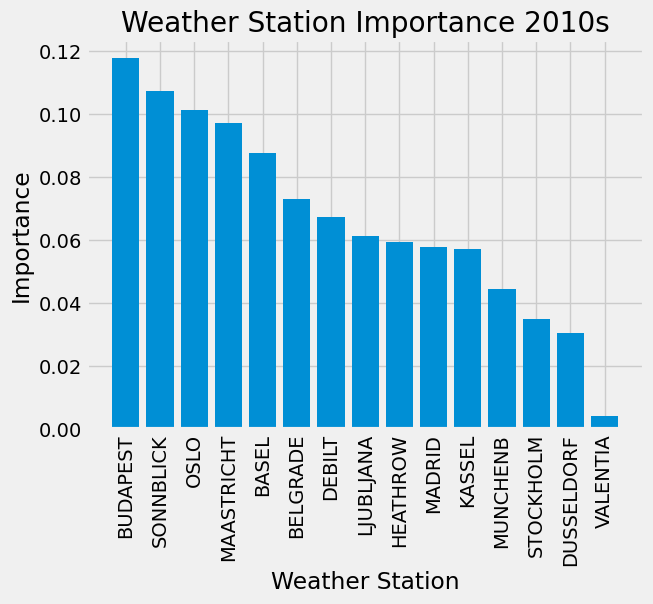

In [94]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s')

plt.show()

### 7. Budapest

Reducing columns down to just Budapest

In [108]:
# Create a list of the columns containing "Budapest" in their names

bud_list = [col for col in df2010.columns if 'BUDAPEST' in col]
bud_list

['BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max']

In [112]:
bud = df[bud_list]
bud

BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                         4               0.67              1.017   
1                         4               0.67              1.017   
2                         4               0.67              1.017   
3                         4               0.67              1.017   
4                         4               0.67              1.017   
...                     ...                ...                ...   
22945                     4               0.67              1.017   
22946                     4               0.67              1.017   
22947                     4               0.67              1.017   
22948                     4               0.67              1.017   
22949                     4               0.67              1.017   

       BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                           0.44                    0.01                2.3   
1                           0.18                    0.31                0.0   
2                           0.30                    0.00                0.6   
3                           0.19                    0.00                0.0   
4                           0.19                    0.00                0.0   
...                          ...                     ...                ...   
22945                       1.41                    0.14                5.4   
22946                       1.41                    0.14                5.4   
22947                       1.41                    0.14                5.4   
22948                       1.41                    0.14                5.4   
22949                       1.41                    0.14                5.4   

       BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  
0                     2.4               -0.4                5.1  
1                     2.3                1.4                3.1  
2                     2.7                1.7                5.3  
3                     2.0                0.4                4.4  
4                     2.5                1.1                5.3  
...                   ...                ...                ...  
22945                11.7                7.9               16.2  
22946                11.7                7.9               16.2  
22947                11.7                7.9               16.2  
22948                11.7                7.9               16.2  
22949                11.7                7.9               16.2  

[22950 rows x 9 columns]

In [114]:
pleasant_bud = pleasant['BUDAPEST_pleasant_weather']
pleasant_bud

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: BUDAPEST_pleasant_weather, Length: 22950, dtype: int64

In [116]:
pleasant_bud.shape

(22950,)

In [118]:
X2 = bud 

In [120]:
y2 = pleasant_bud

In [122]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [124]:
X.shape

(22950, 9)

In [126]:
y.shape

(22950,)

In [128]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [130]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [132]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [134]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


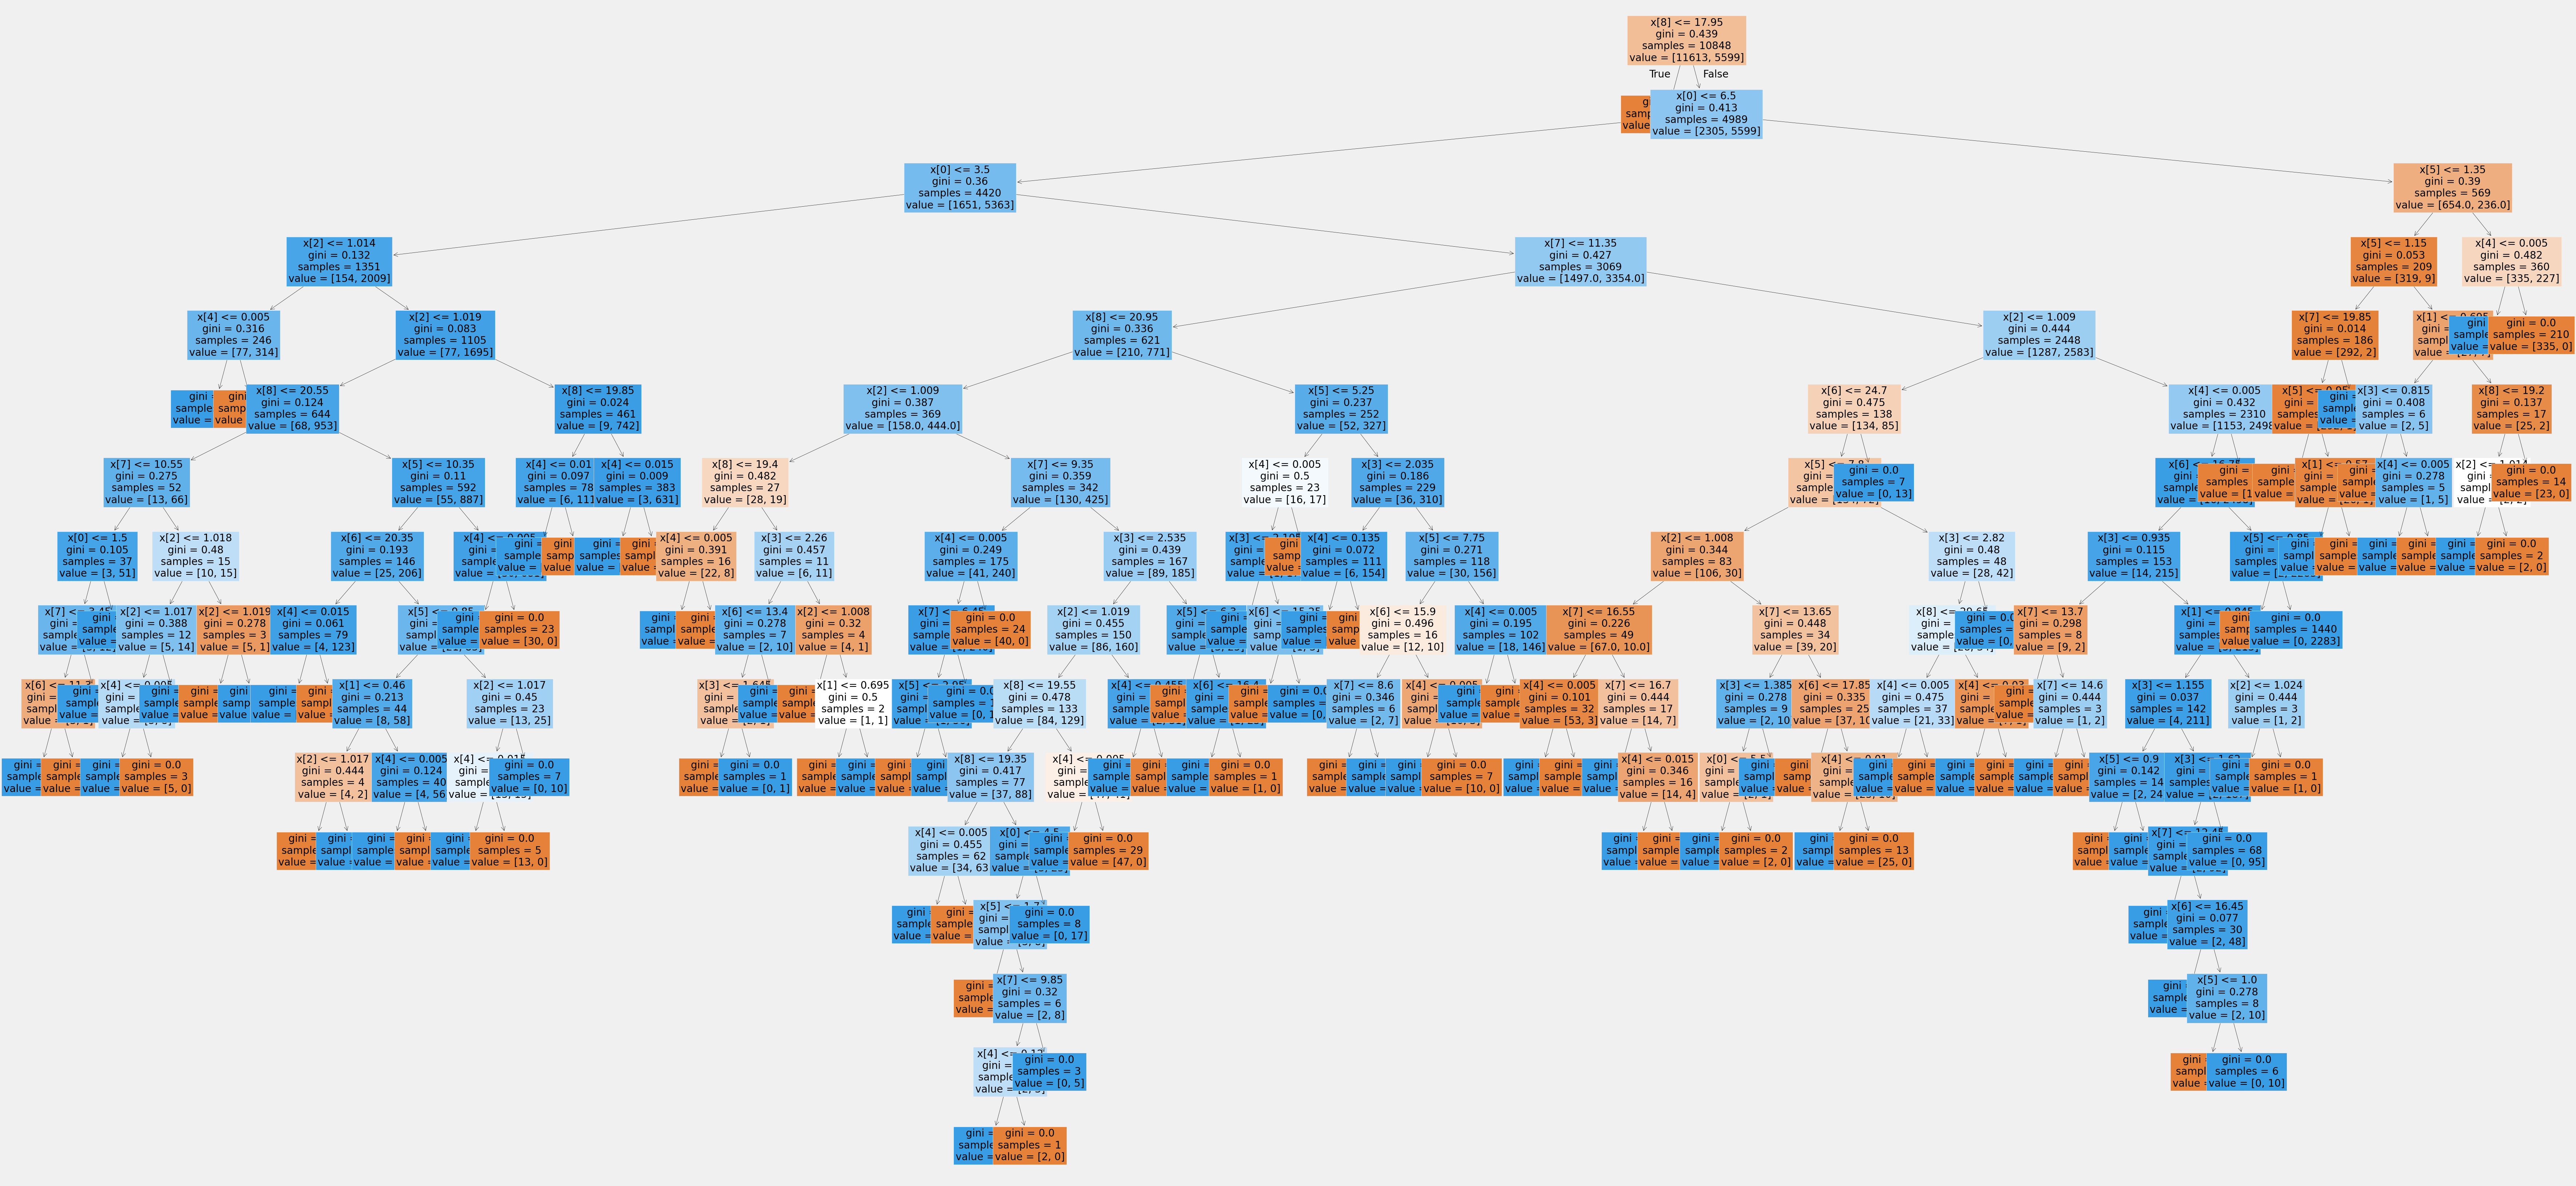

In [136]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);

In [138]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.01045596, 0.00515883, 0.00396316, 0.05275184, 0.35000463,
       0.06247775, 0.13277578, 0.06034397, 0.32206809])

In [140]:
bud_list_again = [feature.replace('BUDAPEST_', '') for feature in bud_list]
bud_list_again

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [142]:
important = pd.Series(newarray, index = bud_list_again)
important

cloud_cover         0.010456
humidity            0.005159
pressure            0.003963
global_radiation    0.052752
precipitation       0.350005
sunshine            0.062478
temp_mean           0.132776
temp_min            0.060344
temp_max            0.322068
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


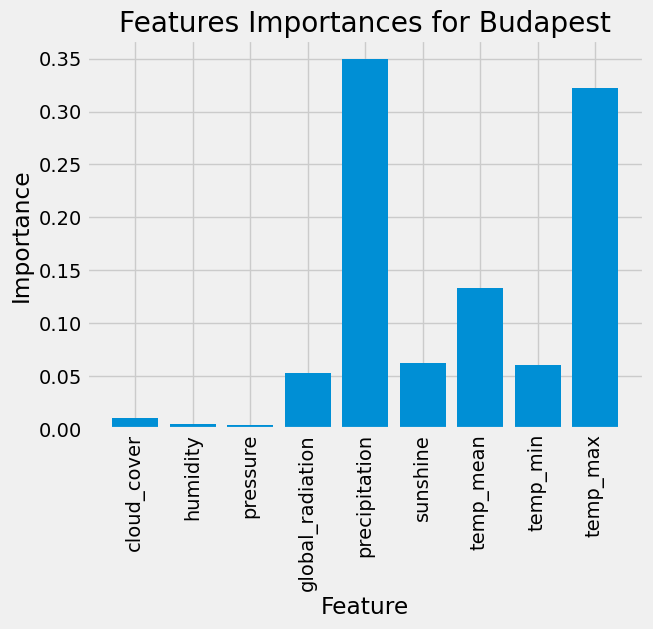

In [148]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(bud_list_again)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, bud_list_again, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Budapest');

plt.show()

### 8. Sonnblick

Reducing columns down to just Sonnblick

In [157]:
# Create a list of the columns containing "Sonnblick" in their names

son_list = [col for col in df2010.columns if 'SONNBLICK' in col]
son_list

['SONNBLICK_cloud_cover',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max']

In [159]:
son = df[son_list]
son

SONNBLICK_cloud_cover  SONNBLICK_humidity  SONNBLICK_pressure  \
0                          4                0.73              1.0304   
1                          6                0.97              1.0292   
2                          8                0.93              1.0320   
3                          5                0.93              1.0443   
4                          2                0.75              1.0430   
...                      ...                 ...                 ...   
22945                      2                0.84              1.0263   
22946                      5                0.84              1.0263   
22947                      3                0.84              1.0263   
22948                      3                0.84              1.0263   
22949                      4                0.84              1.0263   

       SONNBLICK_global_radiation  SONNBLICK_precipitation  \
0                            0.48                     0.01   
1                            0.21                     0.61   
2                            0.21                     3.20   
3                            0.22                     1.10   
4                            0.72                     0.01   
...                           ...                      ...   
22945                        1.56                     0.47   
22946                        1.56                     0.47   
22947                        1.56                     0.47   
22948                        1.56                     0.47   
22949                        1.56                     0.47   

       SONNBLICK_sunshine  SONNBLICK_temp_mean  SONNBLICK_temp_min  \
0                     2.3                 -5.9                -8.5   
1                     0.0                 -9.5               -10.5   
2                     0.0                 -9.5               -10.0   
3                     0.0                -11.5               -12.9   
4                     6.1                 -9.3               -12.0   
...                   ...                  ...                 ...   
22945                 4.7                  0.6                -1.4   
22946                 4.7                  2.3                 0.6   
22947                 4.7                  3.3                 2.1   
22948                 4.7                  3.4                 2.7   
22949                 4.7                  1.7                 0.7   

       SONNBLICK_temp_max  
0                    -3.2  
1                    -8.5  
2                    -8.9  
3                   -10.0  
4                    -6.5  
...                   ...  
22945                 2.6  
22946                 4.0  
22947                 4.5  
22948                 4.1  
22949                 2.7  

[22950 rows x 9 columns]

In [161]:
pleasant_son = pleasant['SONNBLICK_pleasant_weather']
pleasant_son

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: SONNBLICK_pleasant_weather, Length: 22950, dtype: int64

In [163]:
X3 = son 

In [165]:
y3 = pleasant_son

In [167]:
# Turn X3 and y3 from df to arrays

X = np.array(X3)
y = np.array(y3)

In [169]:
X.shape

(22950, 9)

In [175]:
y.shape

(22950,)

In [177]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [179]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [181]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [183]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


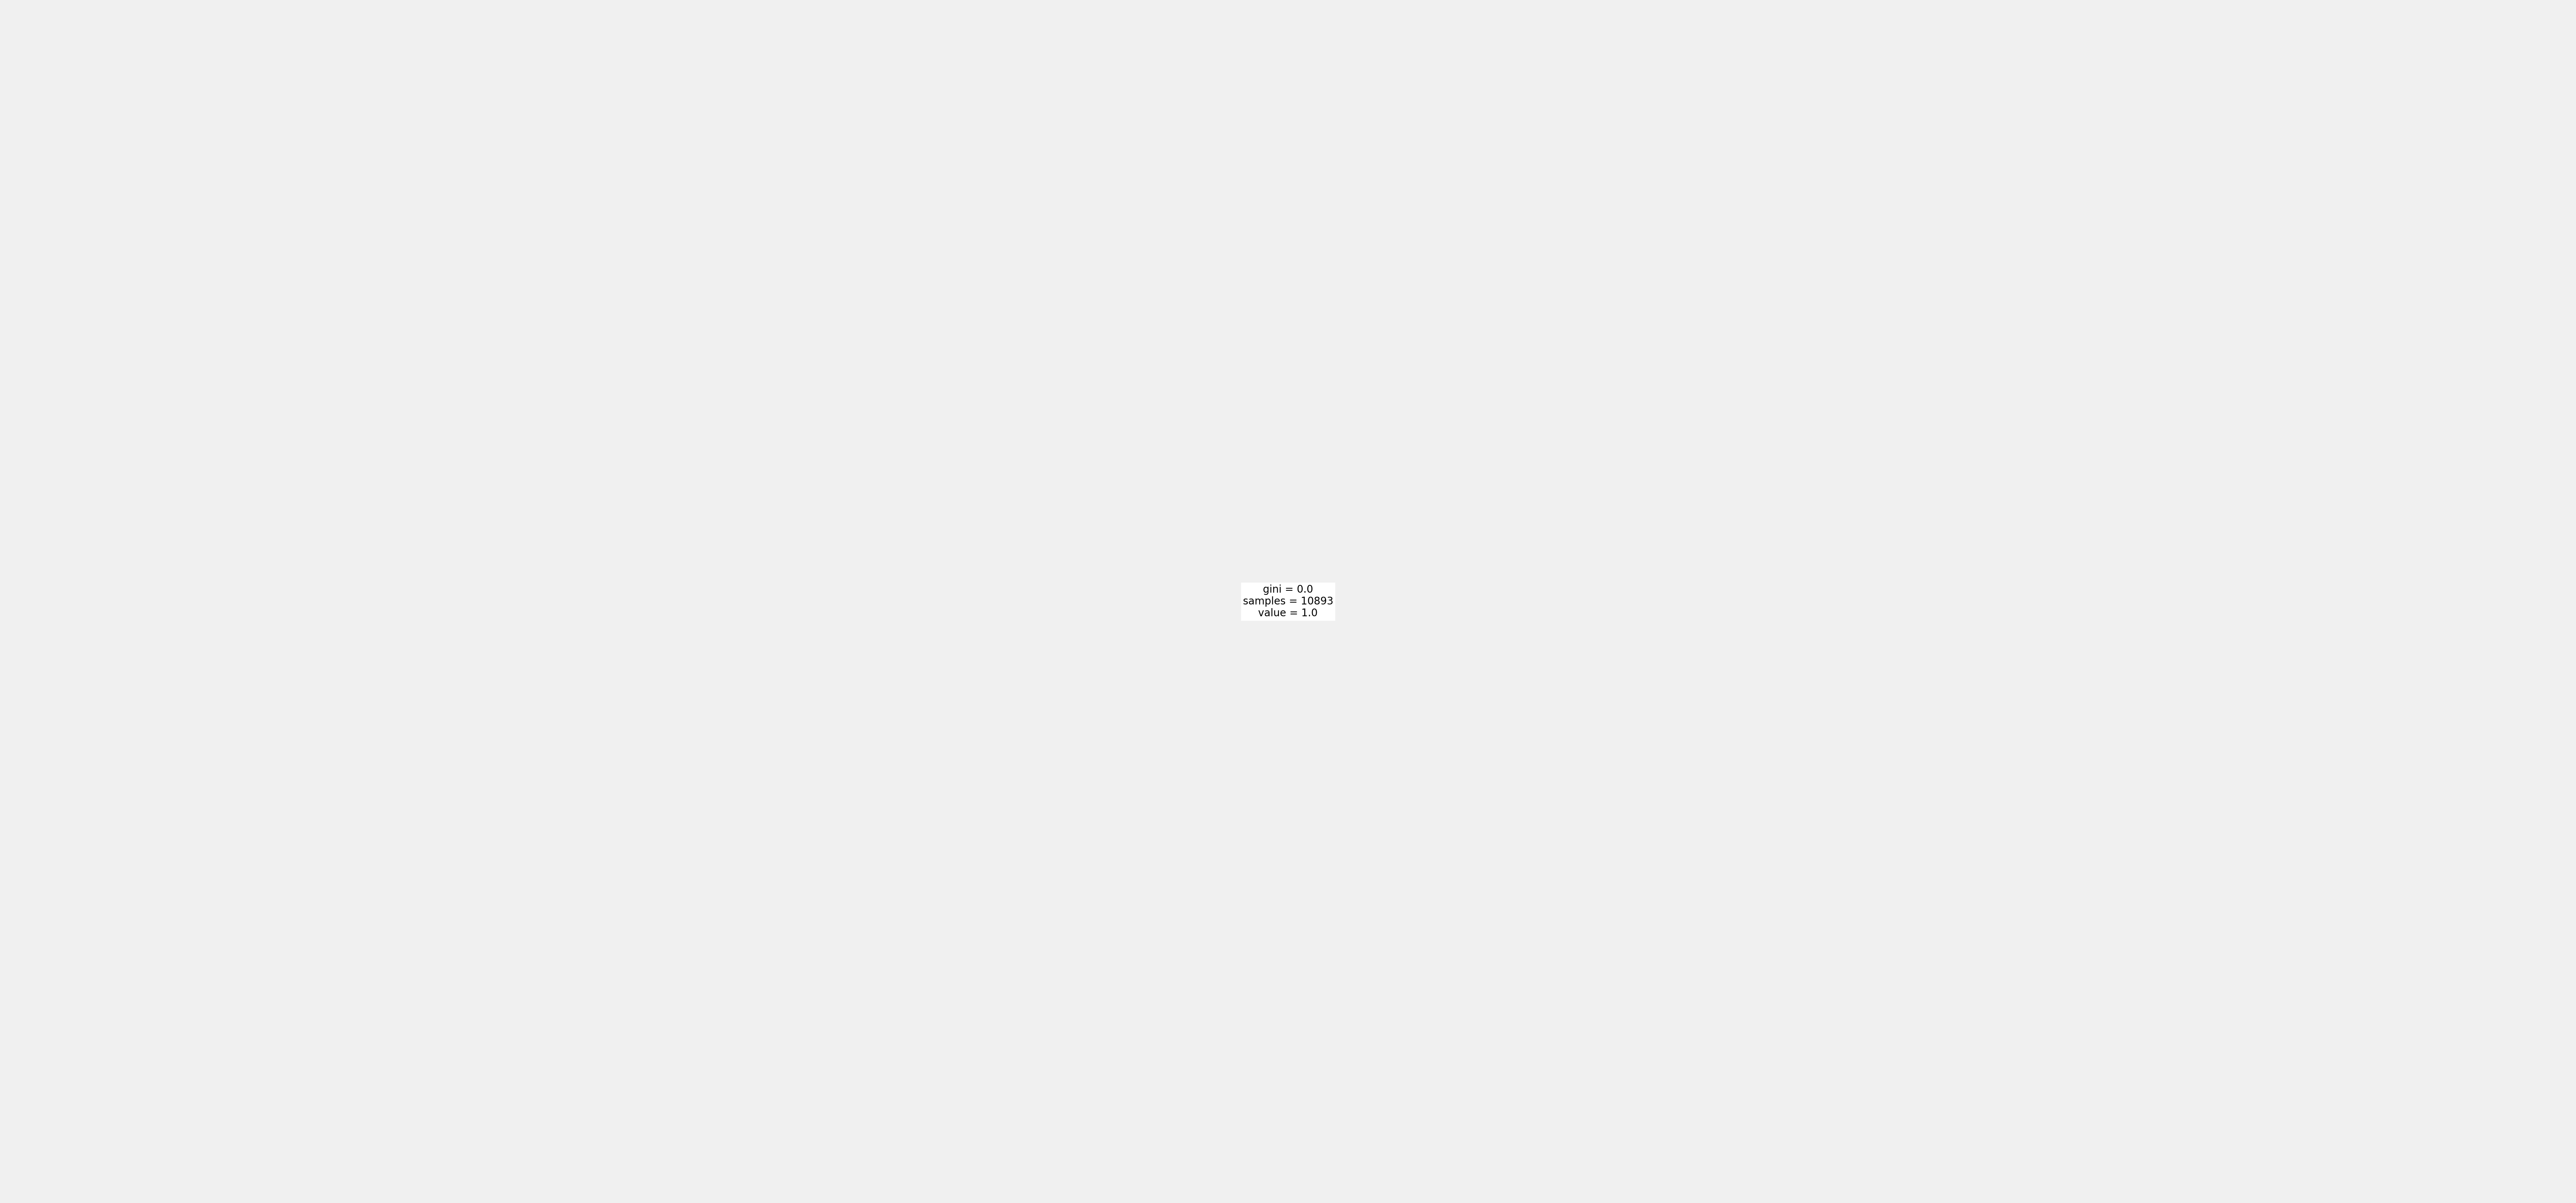

In [185]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);

In [187]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [189]:
son_list_again = [feature.replace('SONNBLICK_', '') for feature in son_list]
son_list_again

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [191]:
important = pd.Series(newarray, index = bud_list_again)
important

cloud_cover         0.0
humidity            0.0
pressure            0.0
global_radiation    0.0
precipitation       0.0
sunshine            0.0
temp_mean           0.0
temp_min            0.0
temp_max            0.0
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


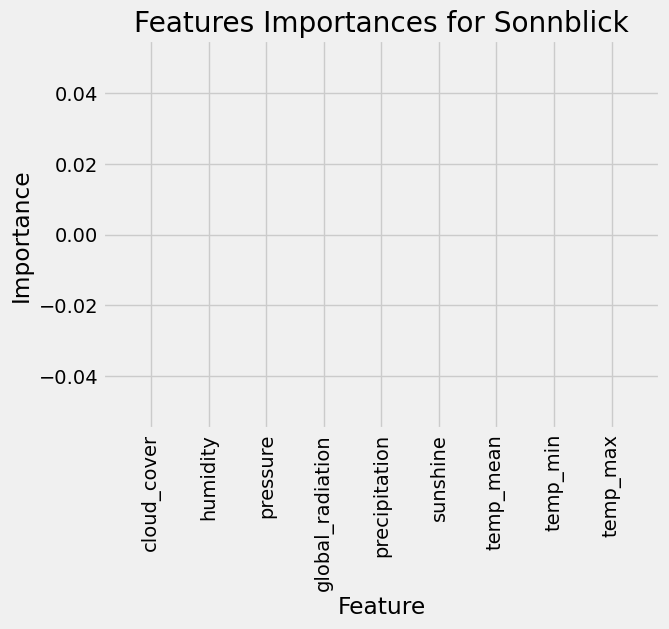

In [193]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(bud_list_again)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, bud_list_again, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Sonnblick');

plt.show()

### 9. Oslo

Reducing columns down to just Oslo

In [199]:
# Create a list of the columns containing "Sonnblick" in their names

os_list = [col for col in df2010.columns if 'OSLO' in col]
os_list

['OSLO_cloud_cover',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max']

In [201]:
os = df[os_list]
os

OSLO_cloud_cover  OSLO_humidity  OSLO_pressure  OSLO_global_radiation  \
0                     8           0.98         0.9978                   0.04   
1                     8           0.62         1.0139                   0.04   
2                     8           0.69         1.0234                   0.04   
3                     8           0.98         1.0244                   0.04   
4                     8           0.96         1.0092                   0.05   
...                 ...            ...            ...                    ...   
22945                 8           0.98         1.0139                   1.06   
22946                 8           1.00         1.0107                   1.06   
22947                 3           0.85         1.0082                   1.06   
22948                 5           0.94         1.0150                   1.06   
22949                 6           0.97         1.0148                   1.06   

       OSLO_precipitation  OSLO_sunshine  OSLO_temp_mean  OSLO_temp_min  \
0                    1.14            0.0             4.9            3.8   
1                    0.00            0.0             3.4            2.8   
2                    0.08            0.0             1.9            0.6   
3                    0.35            0.0             3.0            0.4   
4                    0.26            0.0             3.7            2.9   
...                   ...            ...             ...            ...   
22945                0.21            0.1             9.7            5.8   
22946                0.21            0.0            10.9            8.8   
22947                0.21            6.8             9.7            7.7   
22948                0.21            2.9             5.9            2.1   
22949                0.21            1.9             9.2            7.5   

       OSLO_temp_max  
0                5.9  
1                4.9  
2                3.1  
3                4.9  
4                4.9  
...              ...  
22945           12.0  
22946           11.7  
22947           14.2  
22948            8.1  
22949           13.3  

[22950 rows x 9 columns]

In [203]:
pleasant_os = pleasant['OSLO_pleasant_weather']
pleasant_os

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: OSLO_pleasant_weather, Length: 22950, dtype: int64

In [205]:
X4 = os 

In [207]:
Y4 = pleasant_os

In [211]:
# Turn X4 and Y4 from df to arrays

X = np.array(X4)
y = np.array(Y4)

In [213]:
X.shape

(22950, 9)

In [217]:
y.shape

(22950,)

In [219]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [221]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [223]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [225]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


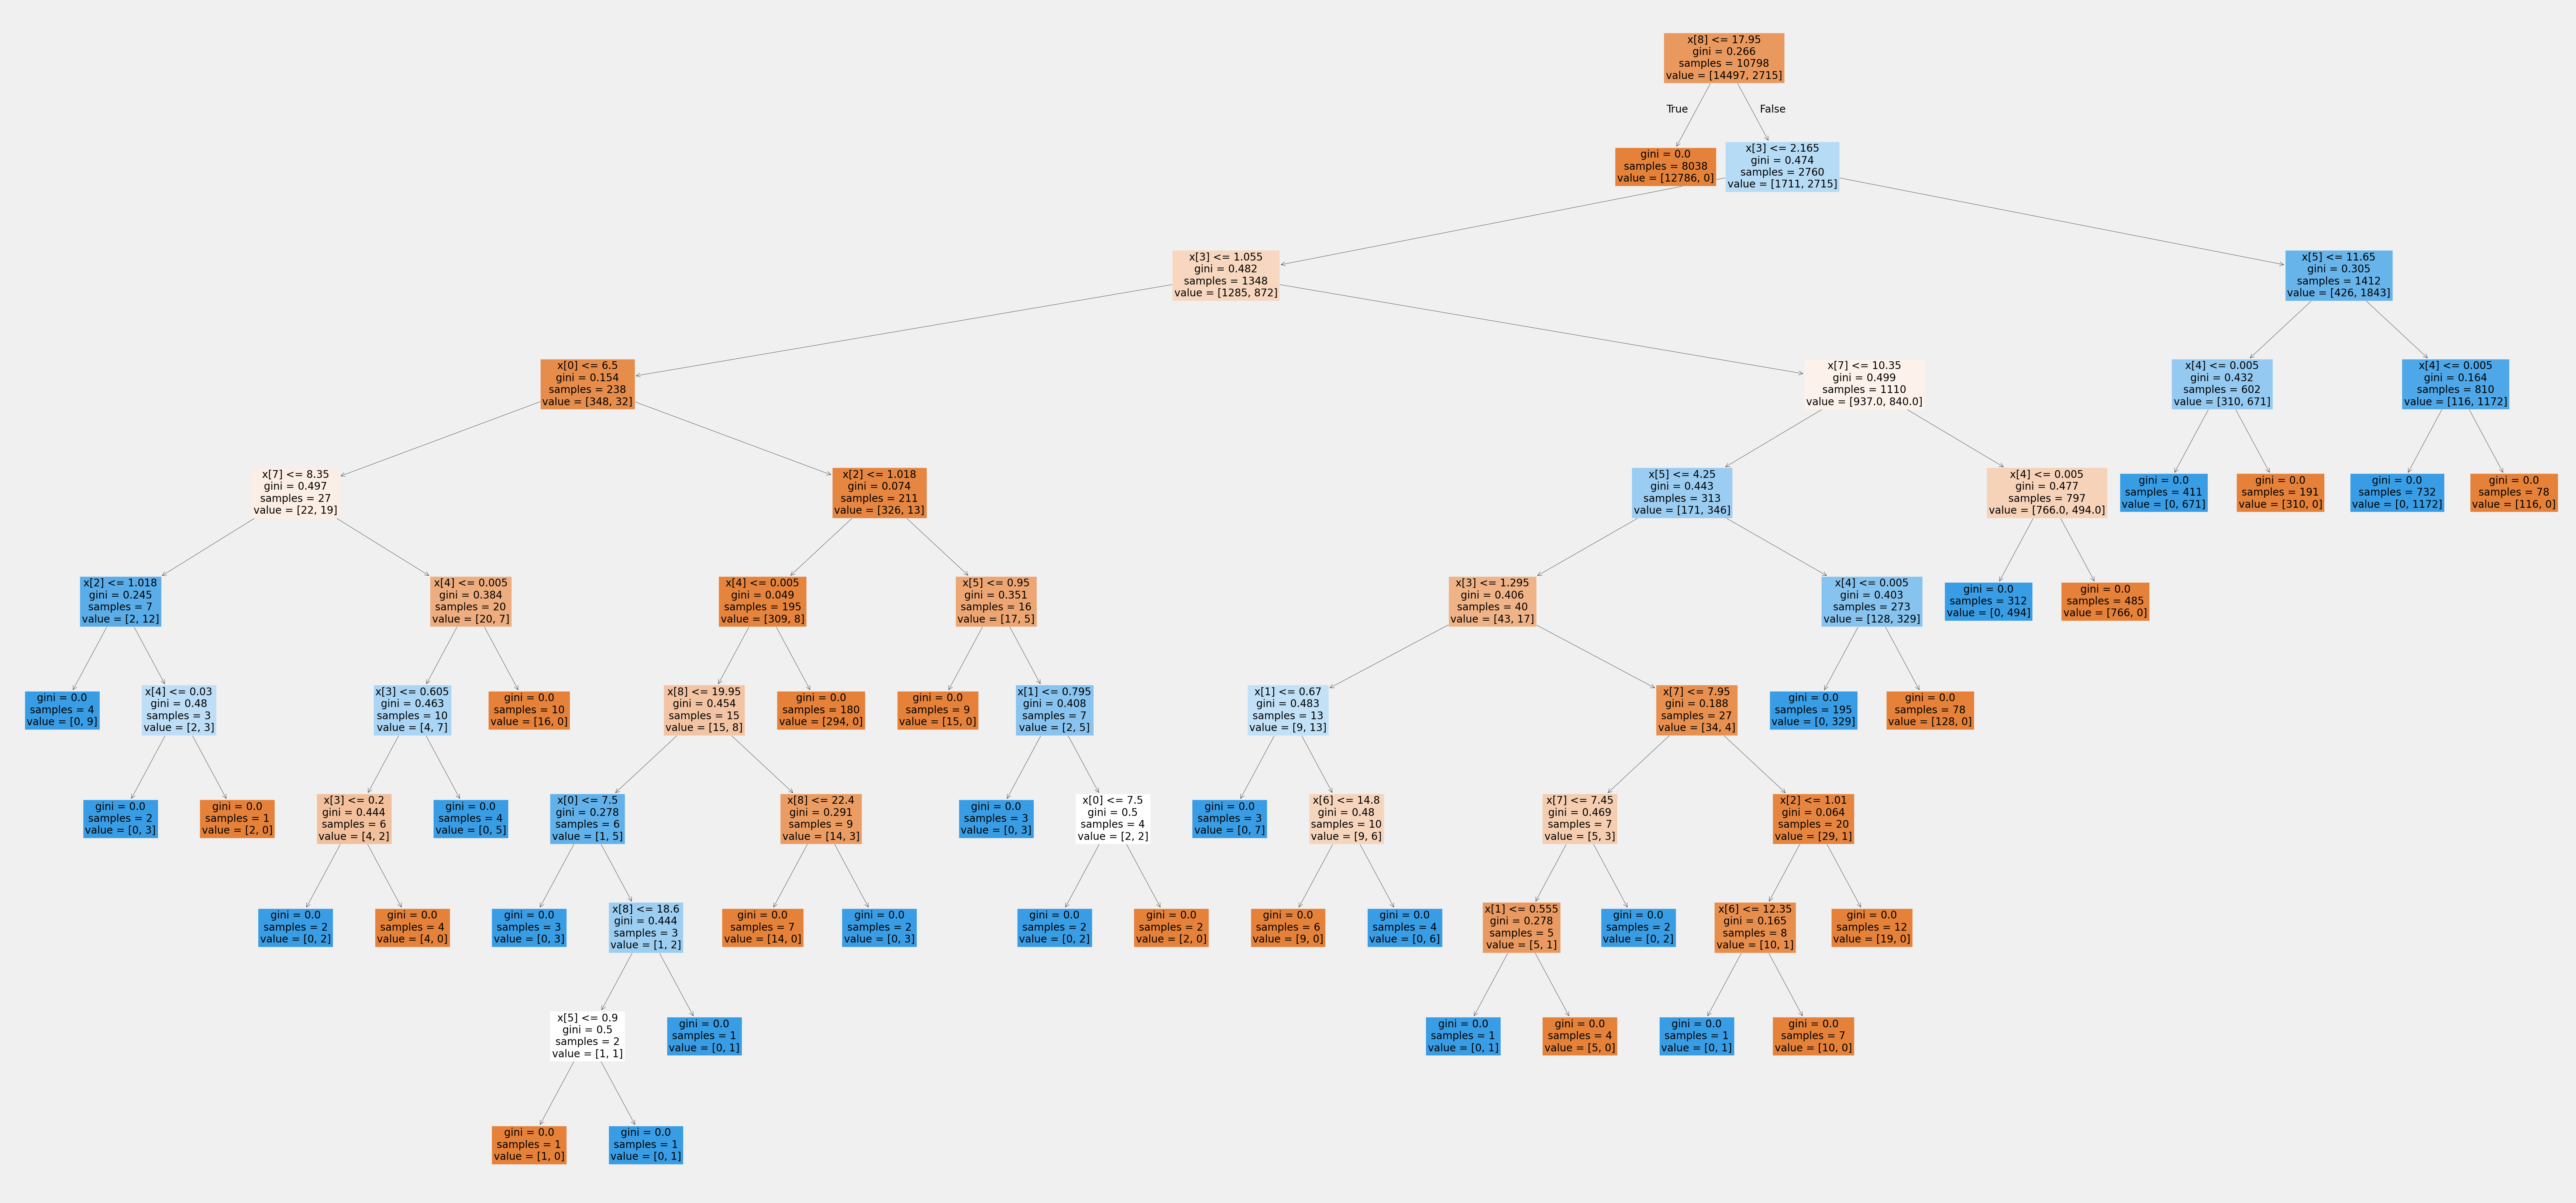

In [227]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);

In [229]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.02028827, 0.01532908, 0.01352557, 0.07791689, 0.30465442,
       0.09968218, 0.13531365, 0.03269289, 0.30059704])

In [231]:
os_list_again = [feature.replace('OSLO_', '') for feature in os_list]
os_list_again

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [233]:
important = pd.Series(newarray, index = os_list_again)
important

cloud_cover         0.020288
humidity            0.015329
pressure            0.013526
global_radiation    0.077917
precipitation       0.304654
sunshine            0.099682
temp_mean           0.135314
temp_min            0.032693
temp_max            0.300597
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


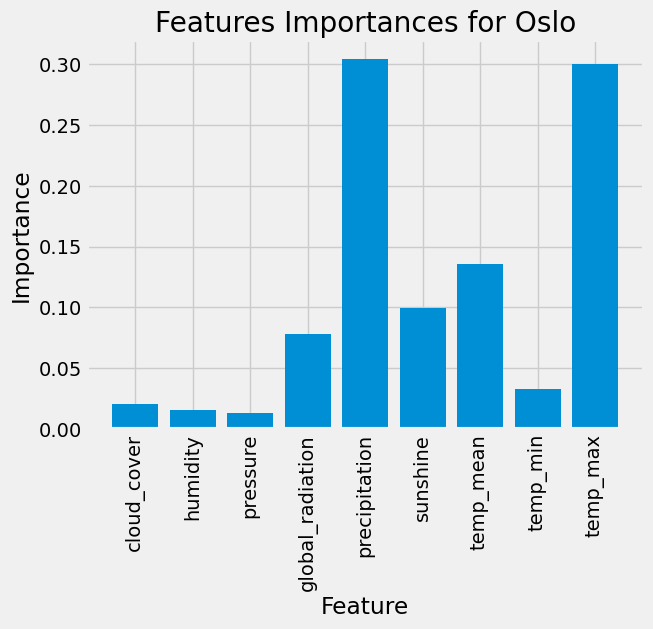

In [235]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(bud_list_again)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, bud_list_again, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Oslo');

plt.show()